# Do Police Bodycams Prevent Gun Deaths?
## *by race, income,  police force diversity, mental illness*
## 2015 Data by Neighborhood/Zip/City
## Data sources
- Fatal Shootings by Police: Booleans[Body Cams, Officer Charged, Flee, Mental Illness, Threat Level], and news articles per death
- Police Deaths by Stabbing or Gunshot
- Police Force Diversity 
- Racial Diversity of Neighborhood (what is diversity in average white, black, asian, hispanic neighborhood
- Income Mean and Population
- News Report
- District Attorney report pdf
- WestLaw on Suspect [possibility?]

## Additional Questions
- Is a Police officer more likely to be exonerated for shooting a suspect by datasets above?
- Are certain areas likely to benefit from Body Cams given dataset (given lawsuits for wrongful death)


In [1]:
import numpy as np
import pandas as pd
import math
import seaborn
import pickle

# Cleaning Data for Fatal Shootings by Police

In [2]:
df = pd.read_csv('fatal-police-shootings-data.csv')
df2 = pd.read_json('https://s3.amazonaws.com/postgraphics/policeshootings/policeshootings2015.json')

In [3]:
df3= pd.merge(df, df2, left_index=True, right_index=True, suffixes=('_left', '_right'), how='left')

In [4]:
df4= pd.merge(df, df2, how='left', left_index=True, right_index=True)

In [5]:
df6 = df3[['id_left', 'name_left', 'date_left', 'manner_of_death', 'armed_left',
       'age_left', 'gender_left', 'race_left', 'city_left', 'state_left',
       'signs_of_mental_illness', 'threat_level', 'flee_left', 'body_camera',
       'age_right', 'armed_right', 'blurb',
       'description', 'editor_note',
       'is_body_camera', 'is_geocoding_exact', 'is_officer_charged', 'lat',
       'lon', 'mental', 'name_right', 'photos', 'race_right', 'sources',
       'state_right', 'threat_level_display', 'videos', 'weapon']]
df6.rename(columns=lambda x: x.replace('_left', ''), inplace=True)
df6['date'] = pd.to_datetime(df6['date'], format='%Y-%m-%d')
df6['sources'].to_json()

//anaconda/lib/python3.5/site-packages/pandas/core/frame.py:2697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


'{"0":[{"source_name":"kbkw.com","type":"NEWS","title":"Suicidal Shelton man dies after confronting responding deputies ","url":"http:\\/\\/kbkw.com\\/suicidal-shelton-man-dies-after-confronting-responding-deputies\\/"},{"source_name":"kmasnewsradio.com","type":"NEWS","title":"Fatal Shooting Justified By Investigation Team - KMAS NewsRadio","url":"http:\\/\\/kmasnewsradio.com\\/news\\/local-state-news\\/21013-fatal-shooting-justified-by-ciit"}],"1":[{"source_name":"OregonLive.com","type":"NEWS","title":"Aloha man killed in police-involved shooting","url":"http:\\/\\/www.oregonlive.com\\/aloha\\/index.ssf\\/2015\\/01\\/aloha_man_killed_in_police-inv.html"},{"source_name":"OregonLive.com","type":"NEWS","title":"Aloha man fatally shot by deputies was struck twice, medical examiner says","url":"http:\\/\\/www.oregonlive.com\\/aloha\\/index.ssf\\/2015\\/01\\/aloha_man_fatally_shot_by_depu.html"},{"source_name":"OregonLive.com","type":"NEWS","title":"Washington County sheriff\'s deputy who f

In [6]:
df6.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'age_right', 'armed_right', 'blurb',
       'description', 'editor_note', 'is_body_camera', 'is_geocoding_exact',
       'is_officer_charged', 'lat', 'lon', 'mental', 'name_right', 'photos',
       'race_right', 'sources', 'state_right', 'threat_level_display',
       'videos', 'weapon'],
      dtype='object')

### Info on Body Cams and Other Data for Fatal Shooting by Police
In the Dataset, 140 Body Cams out of 1523

In [7]:
body_cam = len(df[df.body_camera==True])
body_cam




140

### Race Data of who is shot
W=740, B=389, H=252, A=22, O=21, N=18

In [8]:
df6.race.value_counts(normalize=True).to_dict()



{'A': 0.014445173998686802,
 'B': 0.25541694024950756,
 'H': 0.16546290216677609,
 'N': 0.011818778726198293,
 'O': 0.013788575180564675,
 'W': 0.48588312541037426}

### Scrape the news article in the JSON file in sources columns

In [9]:
df6.loc[1]['sources'][0]['url']
#json_normalize(json.loads(test['d1'][0])['d1'])

'http://www.oregonlive.com/aloha/index.ssf/2015/01/aloha_man_killed_in_police-inv.html'

In [10]:
#import PyPDF2
#df7.loc[1]['sources']
#json[0][0]["count"]

# Police Deaths Dataframe

- Only 72 deaths in 2015
- Does not seem to be significantly weighted for specific areas...mostly 1 per (puerto rico police dept had 5)

In [6]:
df_police = pd.read_csv('police_deaths.csv')

In [7]:
df_police['date'] = pd.to_datetime(df_police['date'], format='%Y-%m-%d')

In [8]:
#df_2015 = df_police[(df_police.cause=='Cause of Death: Gunfire') and (df_police.date > 2015)]
df_2015 = df_police[(
            (df_police['year'] > 1990) & 
            (df_police.cause.str.contains('Gunfire') | df_police.cause.str.contains('Stabbed') )
                    )]
                       



In [14]:
df_2015['dept_name'].value_counts()

Puerto Rico Police Department                                            91
New York City Police Department                                          32
Chicago Police Department                                                23
Detroit Police Department                                                17
Philadelphia Police Department                                           15
Los Angeles County Sheriff's Department                                  15
Phoenix Police Department                                                12
Houston Police Department                                                11
Los Angeles Police Department                                            11
United States Department of Justice - Federal Bureau of Investigation    10
Norfolk Police Department                                                10
New Orleans Police Department                                             9
United States Department of Justice - United States Marshals Service      9
Jackson Poli

### Counties, Areas by Lat, Lon––Combine with Police Shootings Table

In [9]:
df_latlon = pd.read_csv('zip_codes_states.csv')
df_latlon.rename(columns={'latitude':'lat', 'longitude':'lon'}, inplace = True)


In [16]:
df_latlon.head()

,zip_code,lat,lon,city,state,county
0,501,40.922326,-72.637078,Holtsville,NY,Suffolk
1,544,40.922326,-72.637078,Holtsville,NY,Suffolk
2,601,18.165273,-66.722583,Adjuntas,PR,Adjuntas
3,602,18.393103,-67.180953,Aguada,PR,Aguada
4,603,18.455913,-67.145780,Aguadilla,PR,Aguadilla


### Racial Diversity by City/Neighborhood
avg_white, .1 = avg black, .2 = avg asian, .3 = avg asian

In [10]:
df_race = pd.read_csv('./FreyACS100MetroExposure_numbers/Sheet2.csv', encoding = "ISO-8859-1")

In [11]:
df_race.head(4)

,FIPS,Name,White,Black,Am Indian/Alaskan Native,Asian,Hawaiian/Pac Islander,Other Race,2+Races%,Hispanic,...,Total.2,White.3,Black.3,Am Indian/Alaskan Native.3,Asian.3,Hawaiian/Pac Islander.3,Other Race.3,2+Races%.3,Hispanic.3,Total.3
0,NaN,USA,79%,7%,1%,3%,0%,0%,2%,9%,...,100%,38%,10%,1%,5%,0%,0%,1%,45%,100%
1,10420,"Akron, OH",89%,7%,0%,2%,0%,0%,1%,1%,...,100%,77%,16%,0%,2%,0%,0%,2%,3%,100%
2,10580,"Albany-Schenectady-Troy, NY",88%,4%,0%,3%,0%,0%,1%,3%,...,100%,71%,15%,0%,3%,0%,1%,2%,7%,100%
3,10740,"Albuquerque, NM",53%,2%,4%,2%,0%,0%,2%,37%,...,100%,36%,3%,4%,1%,0%,0%,1%,54%,100%


### Police Force and it's Racial Breakdown by City

In [12]:
df_police_div = pd.read_csv('police-locals.csv')

In [13]:
df_police_div.head()

,city,police_force_size,all,white,non-white,black,hispanic,asian
0,New York,32300,0.617957,0.446387,0.764419,0.770891365,0.762860728,0.749235474
1,Chicago,12120,0.875000,0.871963,0.877400,0.89740566,0.83982684,0.966666667
2,Los Angeles,10100,0.228218,0.152778,0.263848,0.387387387,0.217679558,0.305263158
3,Washington,9340,0.115632,0.056774,0.157365,0.170189099,0.08988764,0.230769231
4,Houston,7700,0.292208,0.173735,0.399258,0.36637931,0.457142857,0.408163265


### Mean and Median Income By Zip Code

In [14]:
df_income = pd.read_csv('./Mean-Income-ZIP-3/nation-Table 1.csv')
del df_income['Unnamed: 4']
df_income.set_index('Zip')

,Median,Mean,Pop
Zip,,,
1001,"56,663","66,688","16,445"
1002,"49,853","75,063","28,069"
1003,"28,462","35,121","8,491"
1005,"75,423","82,442","4,798"
1007,"79,076","85,802","12,962"
1008,"63,980","78,391","1,244"
1009,"51,452","66,737",889
1010,"75,625","80,919","3,340"
1011,"63,476","77,443","1,323"


### Saving Dataframes as Pickles

In [22]:
pickle.dump(df6, open( "df6_save.p", "wb" ) )
pickle.dump(df_police, open( "df_police_save.p", "wb" ) )
pickle.dump(df_income, open( "df_income_save.p", "wb" ) )
pickle.dump(df_race, open( "df_race_save.p", "wb" ) )
pickle.dump(df_latlon, open( "df_latlon_save.p", "wb" ) )


In [23]:
df6.head(n=1)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,...,lon,mental,name_right,photos,race_right,sources,state_right,threat_level_display,videos,weapon
0,3,Tim Elliot,2015-01-02,shot,gun,53,M,A,Shelton,WA,...,-123.121592,True,Tim Elliot,[],A,[{'url': 'http://kbkw.com/suicidal-shelton-man...,WA,attack,[],DEADLY


In [24]:
df_race.head()

,FIPS,Name,White,Black,Am Indian/Alaskan Native,Asian,Hawaiian/Pac Islander,Other Race,2+Races%,Hispanic,...,Total.2,White.3,Black.3,Am Indian/Alaskan Native.3,Asian.3,Hawaiian/Pac Islander.3,Other Race.3,2+Races%.3,Hispanic.3,Total.3
0,NaN,USA,79%,7%,1%,3%,0%,0%,2%,9%,...,100%,38%,10%,1%,5%,0%,0%,1%,45%,100%
1,10420,"Akron, OH",89%,7%,0%,2%,0%,0%,1%,1%,...,100%,77%,16%,0%,2%,0%,0%,2%,3%,100%
2,10580,"Albany-Schenectady-Troy, NY",88%,4%,0%,3%,0%,0%,1%,3%,...,100%,71%,15%,0%,3%,0%,1%,2%,7%,100%
3,10740,"Albuquerque, NM",53%,2%,4%,2%,0%,0%,2%,37%,...,100%,36%,3%,4%,1%,0%,0%,1%,54%,100%
4,10900,"Allentown-Bethlehem-Easton, PA-NJ",86%,3%,0%,2%,0%,0%,1%,8%,...,100%,57%,8%,0%,2%,0%,0%,2%,32%,100%


In [25]:
#df6.columns
df6.flee.value_counts()

Not fleeing    1063
Car             229
Foot            175
Other            42
Name: flee, dtype: int64

In [26]:
df6.columns
#del df6['state_right']

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'age_right', 'armed_right', 'blurb',
       'description', 'editor_note', 'is_body_camera', 'is_geocoding_exact',
       'is_officer_charged', 'lat', 'lon', 'mental', 'name_right', 'photos',
       'race_right', 'sources', 'state_right', 'threat_level_display',
       'videos', 'weapon'],
      dtype='object')

### Medication or Depression

In [27]:
df6.description.head(1)

0    Elliot, who was on medication for depression, ...
Name: description, dtype: object

In [28]:
len(df6[
        (df6.description.str.contains('medication')) | 
        (df6.description.str.contains('depression'))
        ])

17

### Wearing Body Camera

In [29]:
len(df6[df6.is_body_camera==True]), len(df6)

(70, 1523)

### Type of Weapon

In [30]:
df6.weapon.value_counts()

DEADLY     455
VEHICLE     33
TOY         21
NONE         5
UNDETER      2
OTHER        2
Name: weapon, dtype: int64

### Fled or Not Fled Scene

In [31]:
df6.flee.value_counts()

Not fleeing    1063
Car             229
Foot            175
Other            42
Name: flee, dtype: int64

 ### Is Officer Charged

In [32]:
df6[df6.is_officer_charged==True]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,...,lon,mental,name_right,photos,race_right,sources,state_right,threat_level_display,videos,weapon
77,114,David Kassick,2015-02-02,shot,unarmed,59,M,W,Hummelstown,PA,...,-76.712841,False,David Kassick,"[{'record': 114, 'description': '', 'url': '//...",W,[{'url': 'http://www.pennlive.com/midstate/ind...,PA,other,[],None
174,205,Anthony Hill,2015-03-09,shot,unarmed,27,M,B,Atlanta,GA,...,-84.267137,True,Anthony Hill,"[{'record': 205, 'description': '', 'url': '//...",B,[{'url': 'http://abcnews.go.com/US/wireStory/f...,GA,other,[],None
194,210,Troy Ray Boyd,2015-03-15,shot,machete,27,M,W,Ruth,MS,...,-90.302843,False,Troy Ray Boyd,[],W,[{'url': 'http://www.wapt.com/news/central-mis...,MS,other,[],DEADLY
238,264,Robert Rooker,2015-03-29,shot,vehicle,26,M,W,Jasper,OH,...,-83.255029,False,Robert Rooker,[],W,[{'url': 'http://www.newswatchman.com/news/art...,OH,attack,[],VEHICLE
249,291,Eric Harris,2015-04-02,shot,unarmed,44,M,B,Tulsa,OK,...,-95.940328,False,Eric Harris,"[{'record': 291, 'description': '', 'url': '//...",B,[{'url': 'http://www.fox23.com/news/news/local...,OK,other,"[{'record': 291, 'description': 'Body camera v...",None
253,297,Walter Scott,2015-04-04,shot and Tasered,unarmed,50,M,B,North Charleston,SC,...,-80.013735,False,Walter Scott,"[{'record': 297, 'description': '', 'url': '//...",B,[{'url': 'http://www.abcnews4.com/story/287205...,SC,other,[],None
299,391,William Chapman,2015-04-22,shot,unarmed,18,M,B,Portsmouth,VA,...,-76.340321,False,William Chapman,[],B,[{'url': 'http://wavy.com/2015/04/22/police-on...,VA,undetermined,[],None
535,653,Samuel DuBose,2015-07-19,shot,unarmed,43,M,B,Mt. Auburn,OH,...,-84.513164,False,Samuel DuBose,"[{'record': 653, 'description': '', 'url': '//...",B,[{'url': 'http://www.cincinnati.com/story/news...,OH,other,"[{'record': 653, 'description': 'DuBose, a 43-...",None
787,931,Corey Jones,2015-10-18,shot,gun,31,M,B,Palm Beach Gardens,FL,...,-80.081680,False,Corey Jones,[],B,[{'url': 'http://www.palmbeachpost.com/news/ne...,FL,undetermined,[],None
829,980,Jeremy Mardis,2015-11-03,shot,unarmed,6,M,W,Marksville,LA,...,-92.050002,False,Jeremy Mardis,[],W,[{'url': 'http://theadvocate.com/news/13886147...,LA,other,[],None


### Signs of Mental Illness

In [33]:
len(df6[df6.signs_of_mental_illness==True]), len(df6)

(382, 1523)

### Threat Level Display

In [34]:
df6.threat_level_display.value_counts()

attack          730
other           216
undetermined     44
Name: threat_level_display, dtype: int64

### Start Downsampling Process
- Shuffle 'Not Charged' Rows, Take 25% of that
- Add Charge Rows (Double)
- Add Noise to Charged Rows (Dates and Ages)
- Shuffle the Rows Again

In [21]:
# Shuffle with 50% of not charged 
df_not_charged = df6[df6.is_officer_charged==False]
df_not_charged = df_not_charged.sample(frac=0.50, replace=True)
df_not_charged.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,...,lon,mental,name_right,photos,race_right,sources,state_right,threat_level_display,videos,weapon
148,188,Thomas Allen,2015-02-28,shot,unarmed,34,M,B,St Louis,MO,...,-90.232134,False,Thomas Allen,"[{'is_publishable': True, 'credit': 'St. Louis...",B,"[{'source_name': 'stltoday.com', 'type': 'NEWS...",MO,other,[],None
147,187,Deven Guilford,2015-02-28,shot and Tasered,unarmed,17,M,W,Roxand Township,MI,...,-84.836983,False,Deven Guilford,[],W,"[{'source_name': 'MLive.com', 'type': 'NEWS', ...",MI,attack,[],None
735,870,Alejandro Lerma,2015-09-26,shot,gun,23,M,H,Lovington,NM,...,-103.367150,False,Alejandro Lerma,[],H,"[{'source_name': 'www.KOB.com', 'type': 'NEWS'...",NM,attack,[],None
110,149,Jason C. Hendrix,2015-02-14,shot,gun,16,M,W,Essex,MD,...,-76.439504,True,Jason C. Hendrix,[],W,"[{'source_name': 'baltimoresun.com', 'type': '...",MD,attack,[],DEADLY
44,84,Paul Campbell,2015-01-19,shot,knife,49,M,W,Weymouth,MA,...,-70.931608,False,Paul Campbell,[],W,"[{'source_name': 'NECN', 'type': 'NEWS', 'titl...",MA,attack,[],DEADLY


### Charged is True
Generate random dates and age ...or am I supposed to generate something else for noise?

In [22]:
import datetime as dt
from datetime import date
import random

# Original Charged Rows
df_charged_orig = df6[df6.is_officer_charged==True]


# Copied Charged Rows: Randomize Age and Date
df_charged_rnd = df6[df6.is_officer_charged==True]

# AGE Randomize
#df_charged_rnd['age'].describe()
df_charged_rnd['age'] = np.random.normal(35.454545, 15, 11)
df_charged_rnd['age'] = df_charged_rnd['age'].apply(lambda x : int(x))


# DATE Randomize
date_noise = random.randint(-11,11)
df_charged_rnd['date'] = df_charged_rnd['date'].apply(lambda x: x - dt.timedelta(days=date_noise))


#df_charged_rnd.head()


//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

### Concat all The Downsampled Database and Shuffle it

In [23]:
# Concat
#df_dsmpl = pd.concat([df_charged_orig, df_charged_rnd, df_not_charged ])
df_dsmpl = pd.concat([df_charged_orig, df_not_charged ])
df_dsmpl['charged_bool'] = df_dsmpl['is_officer_charged'].astype(int)
df_dsmpl['weapon'] = df_dsmpl['weapon'].replace('', "Unknown")
df_dsmpl = df_dsmpl.sample(frac=1, replace=True)


In [24]:
df_dsmpl.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'age_right', 'armed_right', 'blurb',
       'description', 'editor_note', 'is_body_camera', 'is_geocoding_exact',
       'is_officer_charged', 'lat', 'lon', 'mental', 'name_right', 'photos',
       'race_right', 'sources', 'state_right', 'threat_level_display',
       'videos', 'weapon', 'charged_bool'],
      dtype='object')

In [25]:
df_dsmpl.charged_bool.value_counts()

0    490
1     11
Name: charged_bool, dtype: int64

In [42]:
df_dsmpl.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,...,mental,name_right,photos,race_right,sources,state_right,threat_level_display,videos,weapon,charged_bool
935,1086,Efrain Villanueva,2015-12-12,shot,unknown weapon,NaN,M,NaN,Aurora,CO,...,False,Efrain Villanueva,[],None,[{'url': 'http://www.aurorasentinel.com/news/a...,CO,attack,[],None,0
372,484,James Anthony Cooper,2015-05-21,shot,knife,43,M,W,North Charleston,SC,...,False,James Anthony Cooper,"[{'record': 484, 'description': '', 'url': ' /...",W,[{'url': 'http://www.postandcourier.com/articl...,SC,attack,[],DEADLY,0
265,359,Joseph Jeremy Weber,2015-04-08,shot,knife,28,M,A,Sunnyvale,CA,...,True,Joseph Jeremy Weber,"[{'record': 359, 'description': '', 'url': '//...",A,[{'url': 'http://www.mercurynews.com/crime-cou...,CA,other,[],DEADLY,0
830,977,Joseph Tyndall,2015-11-04,shot,gun,30,M,W,Springfield,MO,...,False,Joseph Tyndall,[],W,[{'url': 'http://www.ky3.com/news/local/man-ki...,MO,attack,[],None,0
849,1013,Andrew Blake,2015-11-10,shot,gun,22,M,W,Dillon,MT,...,False,Andrew Blake,[],W,[{'url': 'http://missoulian.com/news/state-and...,MT,attack,[],None,0


In [97]:
#df_dsmpl.charged_bool.value_counts()
df_dsmpl.charged_bool.value_counts()
#ytest.value_counts()


0    729
1     27
Name: charged_bool, dtype: int64

In [96]:
X['charged_bool'].value_counts()

0    383
1      3
Name: charged_bool, dtype: int64

In [272]:
test=df_dsmpl[df_dsmpl['weapon'].isnull()]

def quick(x):
    if x==None:
        return 'Unknown'
    else:
        return x
    
df_dsmpl['weapon_clean']=df_dsmpl['weapon'].apply(quick)

In [175]:
import sklearn
from sklearn.svm import SVC
from sklearn import cross_validation
from sklearn import preprocessing
from patsy import dmatrices
from sklearn import metrics
from sklearn.metrics import confusion_matrix





# X = dmatrix('charged_bool + date + manner_of_death + signs_of_mental_illness + flee +\
#                 armed + race + city + state + body_camera + weapon'
#                  ,data = df_dsmpl, return_type='dataframe')




# X = dmatrix('charged_bool  + signs_of_mental_illness + flee +\
#                 armed + race + body_camera + weapon'
#                 ,data = df_dsmpl, return_type='dataframe')



# X = dmatrix('charged_bool + race + body_camera + '
#                 ,data = df_dsmpl, return_type='dataframe')


#def feature_selection(string):
   #return dmatrices(string, data = df_dsmpl, return_type='dataframe')
    

#X = feature_selection('charged_bool + signs_of_mental_illness + flee +armed + race + body_camera + weapon')


#df_dsmpl['weapon'] = df_dsmpl['weapon'].replace(None, "Unknown")
y,X=dmatrices('charged_bool ~ signs_of_mental_illness + weapon_clean + armed + race + city +\
            state + age + gender + body_camera + manner_of_death ', data = df_dsmpl, return_type='dataframe')


#                 armed + race + city + state + body_camera + weapon'

#len(y)


#conf[0, 0] / (conf[0, 0] + conf[0, 1])


### All the below going in a second Notebook

### Start Modeling with SVM

In [174]:
df_dsmpl.columns

Index(['index', 'id', 'name', 'date', 'manner_of_death', 'armed', 'age',
       'gender', 'race', 'city', 'state', 'signs_of_mental_illness',
       'threat_level', 'flee', 'body_camera', 'age_right', 'armed_right',
       'blurb', 'description', 'editor_note', 'is_body_camera',
       'is_geocoding_exact', 'is_officer_charged', 'lat', 'lon', 'mental',
       'name_right', 'photos', 'race_right', 'sources', 'state_right',
       'threat_level_display', 'videos', 'weapon', 'charged_bool',
       'weapon_clean'],
      dtype='object')

In [176]:
from sklearn import metrics
xtrain, xtest, ytrain, ytest = cross_validation.train_test_split(X, y, test_size=0.25)
clf = SVC()



#clf.recall(df_test, X['charged_bool'])
clf.fit(xtrain, ytrain)
#print(metrics.roc_curve(ytest, clf.predict(xtest)))
# conf = confusion_matrix(ytest, clf.predict(xtest))
# conf

metrics.recall_score(ytest, clf.predict(xtest))
metrics.precision_score(ytest, clf.predict(xtest))

//anaconda/lib/python3.5/site-packages/sklearn/svm/base.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)
//anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

### Grid Search

In [199]:
y,X=dmatrices('charged_bool ~ manner_of_death + armed + age + gender + race +\
                city + state + signs_of_mental_illness + threat_level + flee + body_camera',
                data = df_dsmpl, return_type='dataframe')
y=np.ravel(y)
y.shape

X.head()

,Intercept,manner_of_death[T.shot and Tasered],armed[T.bean-bag gun],armed[T.blunt object],armed[T.box cutter],armed[T.gun],armed[T.guns and explosives],armed[T.hammer],armed[T.hatchet],armed[T.knife],...,state[T.WV],state[T.WY],signs_of_mental_illness[T.True],threat_level[T.other],threat_level[T.undetermined],flee[T.Foot],flee[T.Not fleeing],flee[T.Other],body_camera[T.True],age
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,31
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,32
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,34
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,25
6,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,21


### Grid Search with SVC

In [273]:
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV

# develop your "tuned parameters"

#from __future__ import print_function

from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC



y,X=dmatrices('charged_bool ~ manner_of_death + armed + age + gender + race +\
                city + state + signs_of_mental_illness + threat_level + flee + body_camera',
                data = df_dsmpl, return_type='dataframe')


n_samples = len(X)

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, np.ravel(y), test_size=0.25, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1,1e-1,1e-2,1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},{'kernel': ['linear'],\
                    'C': [1, 10, 100, 1000]},{'kernel':['poly'],'degree':[1,2,3]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(C=1), tuned_parameters, cv=5, scoring=score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_estimator_)
    print()
    print("Grid scores on development set:")
    print()
    for params, mean_score, scores in clf.grid_scores_:
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() / 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

//anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarnin

# Tuning hyper-parameters for precision

Best parameters set found on development set:

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Grid scores on development set:

0.802 (+/-0.200) for {'C': 1, 'kernel': 'rbf', 'gamma': 1}
0.403 (+/-0.245) for {'C': 1, 'kernel': 'rbf', 'gamma': 0.1}
0.000 (+/-0.000) for {'C': 1, 'kernel': 'rbf', 'gamma': 0.01}
0.000 (+/-0.000) for {'C': 1, 'kernel': 'rbf', 'gamma': 0.001}
0.000 (+/-0.000) for {'C': 1, 'kernel': 'rbf', 'gamma': 0.0001}
0.802 (+/-0.200) for {'C': 10, 'kernel': 'rbf', 'gamma': 1}
0.802 (+/-0.200) for {'C': 10, 'kernel': 'rbf', 'gamma': 0.1}
0.802 (+/-0.200) for {'C': 10, 'kernel': 'rbf', 'gamma': 0.01}
0.000 (+/-0.000) for {'C': 10, 'kernel': 'rbf', 'gamma': 0.001}
0.000 (+/-0.000) for {'C': 10, 'kernel': 'rbf', 'gamma': 0.0001}
0.802 (+/-0.200) for {'C': 100, 'kerne

//anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


### Grid Search with Random Forest

In [28]:
import numpy as np

from time import time
from operator import itemgetter
from scipy.stats import randint as sp_randint

from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import StratifiedKFold
from patsy import dmatrices
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report




y,X=dmatrices('charged_bool ~ manner_of_death + armed + age + gender + race +\
                city + state + signs_of_mental_illness + threat_level + flee + body_camera',
                data = df_dsmpl, return_type='dataframe')


# Split the dataset in four equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, np.ravel(y), test_size=0.25, random_state=0)


# build a classifier
clf = RandomForestClassifier(n_estimators=20)


# Utility function to report best scores
def report(grid_scores, n_top=3):
    top_scores = sorted(grid_scores, key=itemgetter(1), reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
              score.mean_validation_score,
              np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")


# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(1, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run randomized search
n_iter_search = 20

random_search = RandomizedSearchCV(clf, param_distributions=param_dist, scoring = 'recall',
                                   n_iter=n_iter_search)

start = time()
random_search.fit(X, np.ravel(y))
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.grid_scores_)

# use a full grid over all parameters
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [1, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid, scoring= 'recall', cv =StratifiedKFold(np.ravel(y), n_folds=4))
start = time()
grid_search.fit(X, np.ravel(y))

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.grid_scores_)))
report(grid_search.grid_scores_)

RandomizedSearchCV took 3.63 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.388 (std: 0.196)
Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'max_features': 5, 'bootstrap': False, 'criterion': 'entropy', 'min_samples_split': 9}

Model with rank: 2
Mean validation score: 0.388 (std: 0.196)
Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'max_features': 6, 'bootstrap': False, 'criterion': 'entropy', 'min_samples_split': 1}

Model with rank: 3
Mean validation score: 0.388 (std: 0.196)
Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'max_features': 4, 'bootstrap': True, 'criterion': 'gini', 'min_samples_split': 2}

GridSearchCV took 34.73 seconds for 216 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.541 (std: 0.138)
Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'max_features': 3, 'bootstrap': True, 'criterion': 'gini', 'min_samples_split': 1}

Model with rank: 2
Mean validation score: 0.541

In [282]:
#df_dsmpl.columns
df_dsmpl.charged_bool.value_counts()

0    732
1     13
Name: charged_bool, dtype: int64

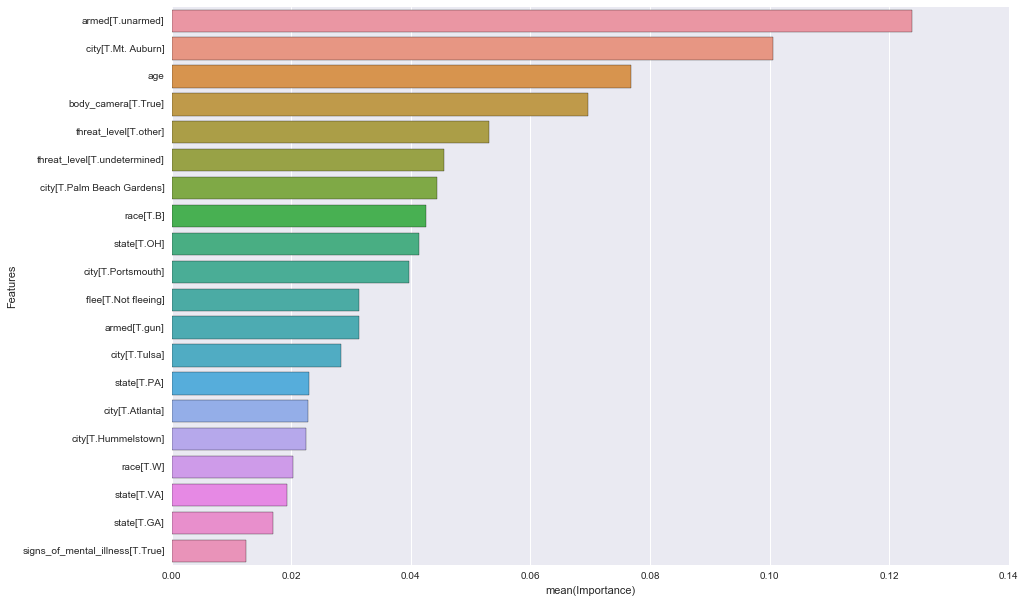

In [29]:
import numpy as np
import seaborn as sns
from sklearn.grid_search import ParameterGrid
%matplotlib inline


clf = RandomForestClassifier(n_estimators=100, criterion='entropy',\
                             max_depth=None, bootstrap=True, min_samples_split=1, 
                             oob_score=True, min_samples_leaf=1)
clf = clf.fit(X, np.ravel(y))
clf.score(X, np.ravel(y))


features = X.columns
feature_importance = clf.feature_importances_
importance_df = pd.DataFrame({'Features': features, 'Importance': feature_importance})
importance_df.sort_values('Importance', inplace = True, ascending = False)

importance_df.sort_values

# Plotting the Graph
g = sns.barplot(x = "Importance", y = "Features", data = importance_df.head(20), orient = "h")
g.figure.set_size_inches(15,10)

In [280]:
clf.oob_score_
y_pred = (clf.oob_decision_function_[:,1]>.5).astype(int)
print(classification_report(y, y_pred))

#len(X)
#df_test.shape
#X.shape
#type(X)
#X.head()
#y.shape
#X.shape, y.shape

             precision    recall  f1-score   support

        0.0       0.99      1.00      1.00       695
        1.0       1.00      0.54      0.70        13

avg / total       0.99      0.99      0.99       708



### Random Forest Test

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


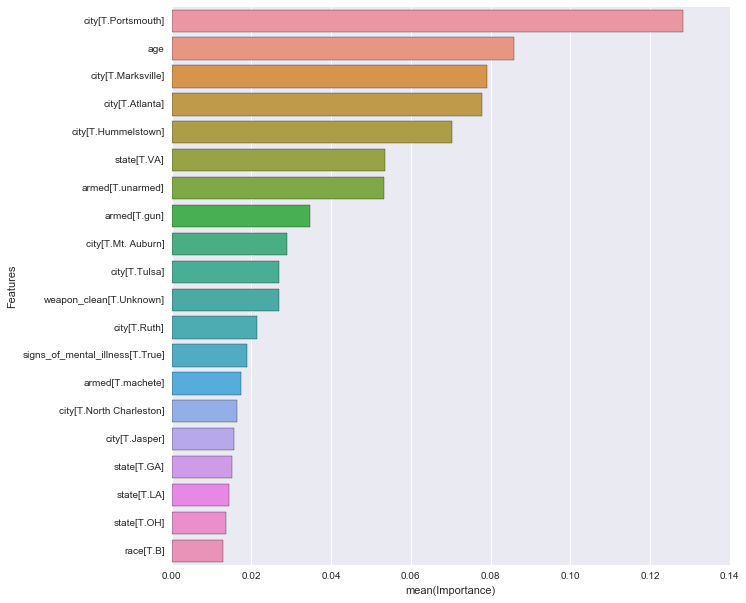

In [188]:
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import pandas as pd
%matplotlib inline


y,X=dmatrices('charged_bool ~ signs_of_mental_illness + weapon_clean + armed + race + city +\
            state + age + gender + body_camera + manner_of_death ', data = df_dsmpl, return_type='dataframe')

xtrain, xtest, ytrain, ytest = cross_validation.train_test_split(X, y, test_size=0.25)

clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, y)
clf.score(X,y)



features = X.columns
feature_importance = clf.feature_importances_
importance_df = pd.DataFrame({'Features': features, 'Importance': feature_importance})
importance_df.sort_values('Importance', inplace = True, ascending = False)

importance_df.sort_values

# Plotting the Graph
g = sns.barplot(x = "Importance", y = "Features", data = importance_df.head(20), orient = "h")
g.figure.set_size_inches(10,10)

In [189]:
metrics.recall_score(ytest, clf.predict(xtest))
metrics.precision_score(ytest, clf.predict(xtest))

1.0

### Save Pickle

In [30]:
# Pickle Save
import pickle
pickle.dump(df_dsmpl, open( "df_dsmpl_orginal_charged_50.p", "wb" ) )

In [50]:
# import pickle
# df_dsmpl = pickle.load(open('df_dsmpl.p', 'rb'))

### Extremely Randomized Forest

In [48]:
# from sklearn.cross_validation import cross_val_score
# from sklearn.datasets import make_blobs
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.tree import DecisionTreeClassifier

# # X = dmatrix('charged_bool + date + manner_of_death + signs_of_mental_illness + flee +\
# #                 armed + race + city + state + body_camera + weapon'
# #                  ,data = df_dsmpl, return_type='dataframe')


# # X = dmatrix('charged_bool + weapon +  signs_of_mental_illness + armed'
# #                  ,data = df_dsmpl, return_type='dataframe')


# X = dmatrix('charged_bool + state'
#                  ,data = df_dsmpl, return_type='dataframe')

# X, y = make_blobs(n_samples=10000, n_features=10, centers=100,
#     random_state=0)

# clf = DecisionTreeClassifier(max_depth=None, min_samples_split=1,
#     random_state=0)
# scores = cross_val_score(clf, X, y)
# scores.mean()                             


# clf = RandomForestClassifier(n_estimators=10, max_depth=None,
#     min_samples_split=1, random_state=0)
# scores = cross_val_score(clf, X, y)
# scores.mean()                             


# clf = ExtraTreesClassifier(n_estimators=10, max_depth=None,
#     min_samples_split=1, random_state=0)
# scores = cross_val_score(clf, X, y)
# scores.mean() > 0.999

# #scores.mean()

True

### Feature Recursion –– Currently Crashes

In [46]:
# import matplotlib.pyplot as plt
# from sklearn.svm import SVC
# from sklearn.cross_validation import StratifiedKFold
# from sklearn.feature_selection import RFECV
# from sklearn.datasets import make_classification
# from patsy import dmatrix

# X = dmatrix('charged_bool + date + manner_of_death + signs_of_mental_illness + flee +\
#                 armed + race + city + state + body_camera + weapon'
#                  ,data = df_dsmpl, return_type='dataframe')

# y = X['charged_bool']
# X = X.drop(['charged_bool'], axis=1)
 


# # Build a classification task using 3 informative features
# # X, y = make_classification(n_samples=1000, n_features=25, n_informative=3,
# #                            n_redundant=2, n_repeated=0, n_classes=8,
# #                            n_clusters_per_class=1, random_state=0)


# X, y = make_classification()

# # Create the RFE object and compute a cross-validated score.
# svc = SVC(kernel="linear")
# # The "accuracy" scoring is proportional to the number of correct
# # classifications
# rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(y, 2),
#               scoring='accuracy')
# rfecv.fit(X, y)

# print("Optimal number of features : %d" % rfecv.n_features_)

# # Plot number of features VS. cross-validation scores
# plt.figure()
# plt.xlabel("Number of features selected")
# plt.ylabel("Cross validation score (nb of correct classifications)")
# plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
# plt.show()